#  Introduction 


Hierarchical Clustering refers to a method of reducing the number of clusters by selecting two nodes and combining them into one.  This is commonly named agglomerative clustering. Initially, all clusters start with a single node but the only one cluster remains after several iterations of merging processes. 

The major part of implementing this algorithm is to decide the method for measuring distances between two clusters. There are two methods of measuring the distance between clusters; a non-hierarchical method that does not depend on the hierarchical method and a hierarchical method that assumes that the clusters have already been combined hierarchically in the previous step.  

In our codes, we will show how the non-hierarchial distance measurement is used.


C:\Users\sd4be\Anaconda3\lib\site-packages\ipykernel_launcher.py:94: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\sd4be\Anaconda3\lib\site-packages\ipykernel_launcher.py:109: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
C:\Users\sd4be\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


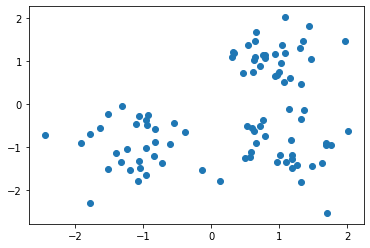

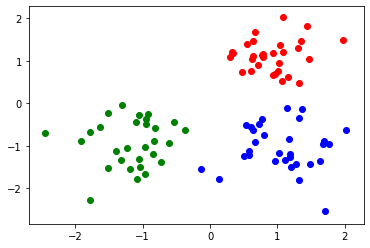

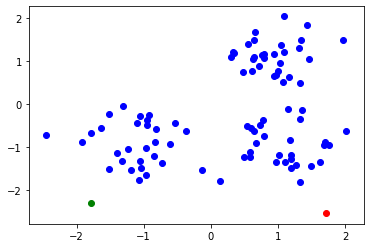

In [55]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.datasets.samples_generator import make_blobs


#vec is the numpy array which contains the vector of the given node
#left and right must be the class type of cluster node
#id shows the index of the node and for the merged node which does not belong to the original set has negative id

class cluster_node:
    def __init__(self,vec,id,left=None,right=None,distance=0.0,node_vector=None):
        self.left_node=left
        self.right_node=right
        self.vec=vec
        self.id=id
        self.distance=distance
        if node_vector is None:
            self.node_vector=[self.id]
        else:
            self.node_vector=node_vector[:]
def euclidean_distance(vec1,vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))

def min_distance(clust1,clust2,distances):
    #distances is a dictionary contains the pairs of id and the distance between nodes
    #initialize the distance as the large amount
    d=np.inf
    for i in clust1.node_vector:
        for j in clust2.node_vector:
            if (i,j) in distances:
                distance=distances[(i,j)]
            elif (j,i) in distances:
                distance=distances[(j,i)]
            else:
                distance=euclidean_distance(clust1.vec,clust2.vec)
            #During the iteration,d wil be updated if the lower value keeps appearing
            #At the end of the loop,d will be the smallest distance in any combinations
            if distance<d:
                d=distance
    return d

k=3
def agglomerative_clustering(data,distance):
    distances={}
    currentclustid=-1
    
    #individual nodes are created in a single row. The number of rows are exactly the same as the number
    #of instances of the data
    nodes=[cluster_node(np.array(data[i]),id=i) for i in range(data.shape[0])]
    
    while len(nodes)>k:
        #start with 0 and 1
        lowestpair=(0,1)
        closest=euclidean_distance(nodes[0].vec,nodes[1].vec)
        for i in range(len(nodes)):
            for j in range(i+1,len(nodes)):
                if (nodes[i].id,nodes[j].id) not in distances:
                    if distance=='min':
                        distances[(nodes[i].id,nodes[j].id)]=min_distance(nodes[i],nodes[j],distances)
                    else:
                        distances[(nodes[i].id,nodes[j].id)]=euclidean_distance(nodes[i].vec,nodes[j].vec)
                d=distances[(nodes[i].id,nodes[j].id)]
                
                if d<closest:
                    closest=d
                    lowestpair=(i,j)
        
        #now,we want to create a new node that contains the left and rigt nodes 
        #Before its creation,we need to compute the vector of the newly created node.
        #It can be computed based on the wieght avaverage of each dimension of left and right node. 
        len_left=len(nodes[lowestpair[0]].node_vector)
        len_right=len(nodes[lowestpair[1]].node_vector)
        mean_vector=[(len_left*nodes[lowestpair[0]].vec[i]+len_right*nodes[lowestpair[1]].vec[i])/(len_right+len_left)\
                     for i  in range(data.shape[1])]
        #Ready to create the new node
        new_node=cluster_node(np.array(mean_vector),currentclustid,left=nodes[lowestpair[0]],right=nodes[lowestpair[1]],\
                              distance=closest,node_vector=nodes[lowestpair[0]].node_vector+nodes[lowestpair[1]].node_vector)
        
        #Remember ids that are not in the original set are negative
        currentclustid-=1
        del nodes[lowestpair[1]]
        del nodes[lowestpair[0]]
        nodes.append(new_node)
    
    return nodes



def main():
	# Generate data
	# df = pd.read_csv('./segmentation.data.modified')
	centers = [[1, 1], [-1, -1], [1, -1]]
	X, _ = make_blobs(n_samples = 90, centers = centers, cluster_std = 0.5)
	df = pd.DataFrame(X) ## convert to DF

	# Visualize the data
	f = plt.figure(1)
	plt.scatter(df[0],df[1])
	f.show()
	colorset = ['red', 'green', 'blue', 'yellow', 'brown', 'orange', 'black']

	data = np.array(df)

	# Average criterion agglomerative clustering
	cluster = agglomerative_clustering(data, "avg")
	# plt.scatter(cluster.leftnode.vec[0], cluster.leftnode.vec[1], color = 'yellow')
	# plt.scatter(cluster.rightnode.leftnode.vec[0], cluster.rightnode.leftnode.vec[1], color = 'red')
	# plt.scatter(cluster.rightnode.rightnode.vec[0], cluster.rightnode.rightnode.vec[1], color = 'green')
	j = 0
	m = plt.figure(2)
	for i in cluster:
		plt.scatter(data[i.node_vector].T[0], data[i.node_vector].T[1], color = colorset[j])
		j += 1
	m.show()

	# Min criterion agglomerative clustering
	g = plt.figure(3)
	cluster = agglomerative_clustering(data, "min")
	# plt.scatter(cluster.leftnode.vec[0], cluster.leftnode.vec[1], color = 'yellow')
	# plt.scatter(cluster.rightnode.leftnode.vec[0], cluster.rightnode.leftnode.vec[1], color = 'red')
	# plt.scatter(cluster.rightnode.rightnode.vec[0], cluster.rightnode.rightnode.vec[1], color = 'green')
	j = 0
	for i in cluster:
		plt.scatter(data[i.node_vector].T[0], data[i.node_vector].T[1], color = colorset[j])
		j += 1
	g.show()


if __name__ == '__main__':
	main()
        
        
        
                        
                    
                
        
    
    
    